# Motif visualization - quick implementation

## Maria Inês Silva
## 12/01/2019

***

## Data and library imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pickle
import os

In [2]:
ts_1d = pickle.load(open("ts_1d.p", "rb"))
mdl_cost_list = pickle.load(open("mdl_cost.p", "rb"))
motif_point_list = pickle.load(open("motif_point.p", "rb"))
pattern_list = pickle.load(open("patterns.p", "rb"))

In [3]:
motif_dic = {'pattern' : pattern_list,
             'pattern_len' : [len(pattern) for pattern in pattern_list],
             'n_members' : [len(temp_motif) for temp_motif in motif_point_list],
             'mdl_cost' : mdl_cost_list}

motif_df = pd.DataFrame(motif_dic).assign(mdl_cost = lambda x: x['mdl_cost'].round(1)).sort_values('mdl_cost')
motif_df.head(30)

,pattern,pattern_len,n_members,mdl_cost
4,[cab],1,543,43997.6
14,[acb],1,520,44196.8
13,[bac],1,499,44200.8
1,[bca],1,530,44322.5
9,[cba],1,673,44541.6
10,[abc],1,624,44769.5
43,"[cba, cab]",2,220,47195.6
15,[bbb],1,723,47701.1
121,"[bac, abc]",2,196,48504.3
52,"[bca, cba]",2,201,49030.1


In [4]:
motif_df[motif_df['pattern_len']>5]

,pattern,pattern_len,n_members,mdl_cost
2938,"[cba, caa, cab, bac, aac, abc]",6,26,71205.1
2742,"[abc, acc, acb, bca, cca, cba]",6,24,73993.9
2991,"[bca, cca, cba, caa, cab, bac]",6,25,74692.7
2491,"[cca, cba, caa, cab, bac, aac]",6,20,74747.1
3285,"[cca, cba, caa, cab, bac, aac, abc]",7,17,75718.3
2927,"[bac, abc, acc, acb, bca, cca]",6,18,76281.5
3321,"[bac, abc, acc, acb, bca, cca, cba]",7,16,76449.9
2555,"[cba, cab, bac, abc, acb, bca]",6,16,76619.4
2771,"[cab, bac, abc, acb, bca, cba]",6,13,76833.6
2504,"[cab, bac, aac, abc, acc, acb]",6,14,77345.6


## Extract and visualize the first motif

In [4]:
motif_index = np.argmin(mdl_cost_list)
motif_pointers = motif_point_list[motif_index]

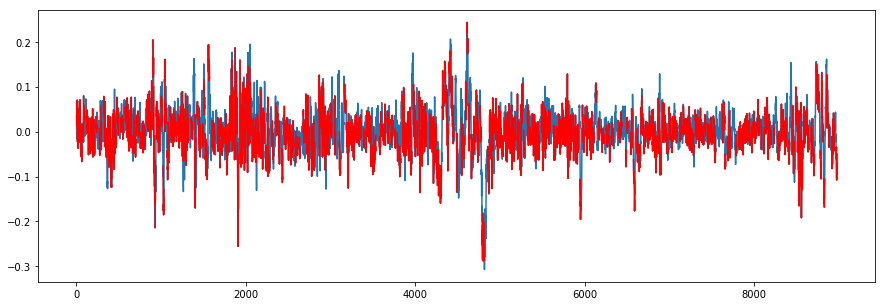

In [5]:
plt.figure(figsize=(15,5))
plt.plot(ts_1d)
for temp_point in motif_pointers:
    plt.plot(temp_point, ts_1d[temp_point], 'r')
plt.show()

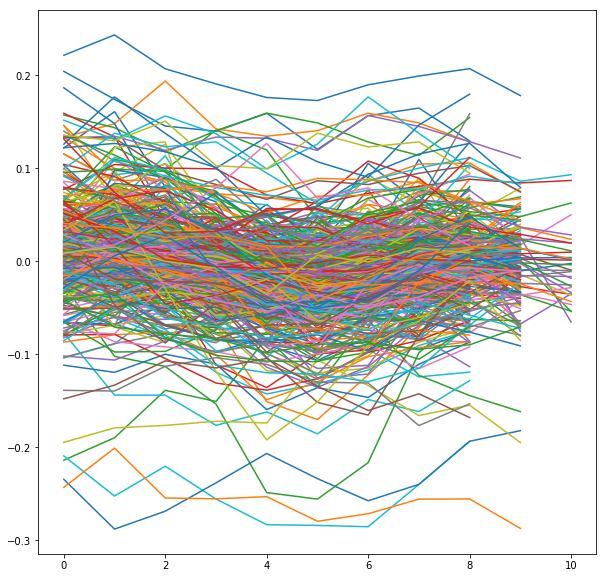

In [6]:
plt.figure(figsize=(10,10))
for temp_point in motif_pointers:
    plt.plot(ts_1d[temp_point])
plt.show()

## Extract and visualize the second motif

In [7]:
del mdl_cost_list[motif_index]

In [8]:
motif_index = np.argmin(mdl_cost_list)
motif_pointers = motif_point_list[motif_index]

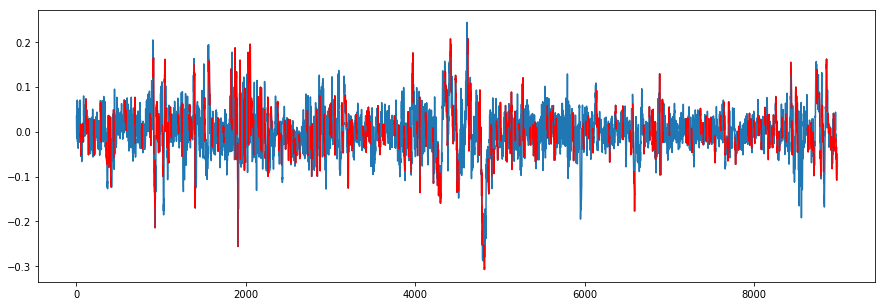

In [9]:
plt.figure(figsize=(15,5))
plt.plot(ts_1d)
for temp_point in motif_pointers:
    plt.plot(temp_point, ts_1d[temp_point], 'r')
plt.show()

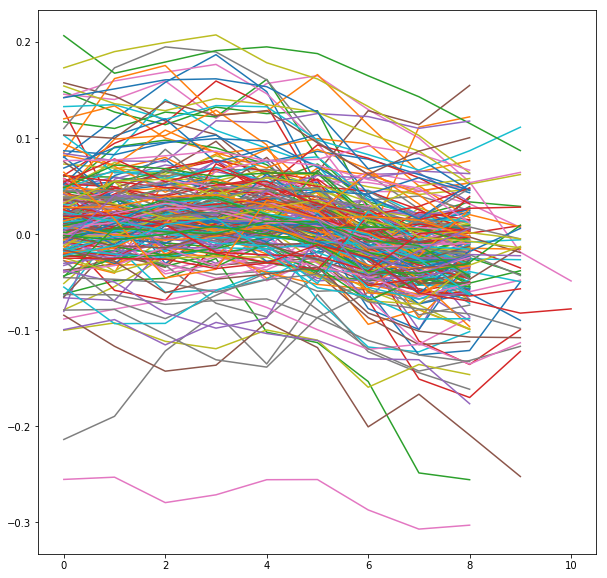

In [10]:
plt.figure(figsize=(10,10))
for temp_point in motif_pointers:
    plt.plot(ts_1d[temp_point])
plt.show()

## Extract and visualize other motifs

In [26]:
index = 3738
motif_pointers = motif_point_list[index]
pattern_list[index]

['bac', 'abc', 'acc', 'acb', 'bca', 'cba', 'caa', 'cab', 'bbb']

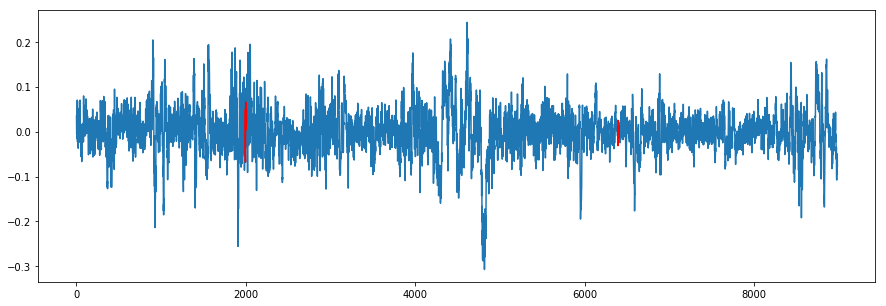

In [27]:
plt.figure(figsize=(15,5))
plt.plot(ts_1d)
for temp_point in motif_pointers:
    plt.plot(temp_point, ts_1d[temp_point], 'r')
plt.show()

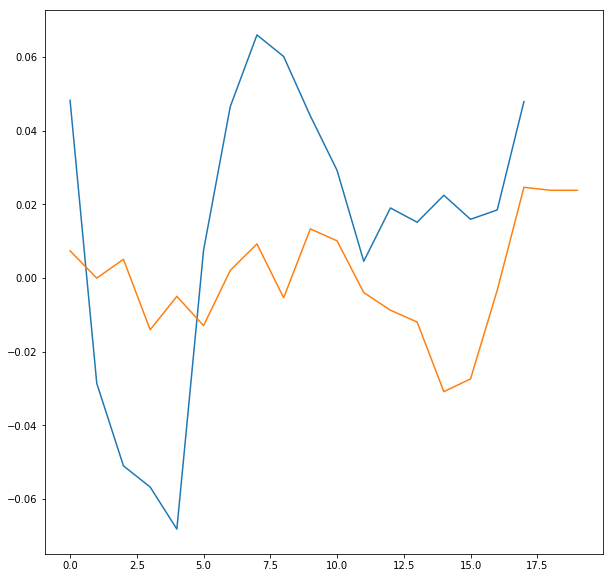

In [28]:
plt.figure(figsize=(10,10))
for temp_point in motif_pointers:
    plt.plot(ts_1d[temp_point])
plt.show()

In [13]:
from dtaidistance import dtw

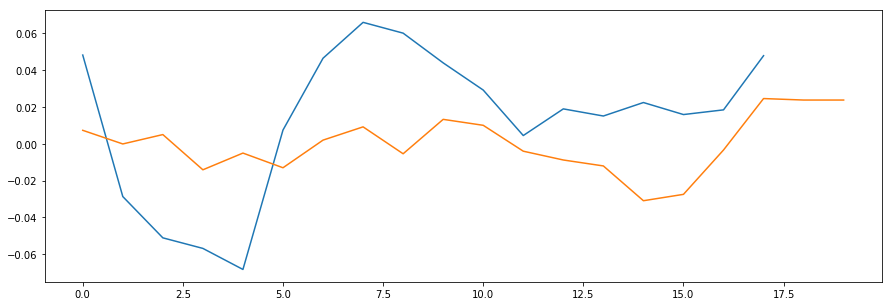

0.138320191122648

In [29]:
plt.figure(figsize=(15,5))
plt.plot(ts_1d[motif_pointers[0]])
plt.plot(ts_1d[motif_pointers[1]])
plt.show()

dtw.distance(ts_1d[motif_pointers[0]], ts_1d[motif_pointers[1]])

In [17]:
dtw.warping_path(ts_1d[motif_pointers[0]], ts_1d[motif_pointers[-3]])

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (2, 13),
 (3, 14),
 (4, 14),
 (5, 14),
 (6, 14),
 (7, 14),
 (8, 14),
 (9, 15),
 (10, 15),
 (11, 15),
 (12, 15),
 (13, 16),
 (14, 16),
 (15, 17),
 (16, 18)]

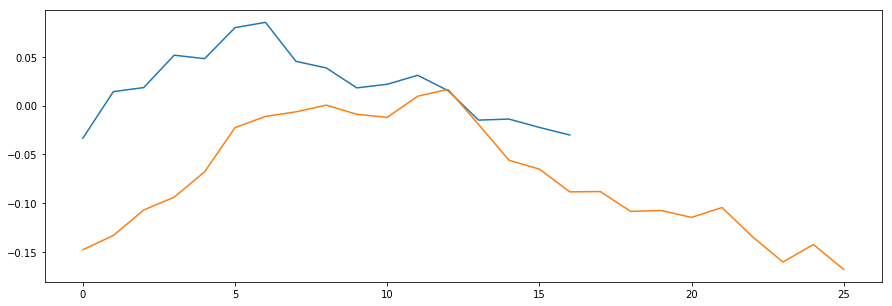

0.37608920096362164

In [15]:
plt.figure(figsize=(15,5))
plt.plot(ts_1d[motif_pointers[-2]])
plt.plot(ts_1d[motif_pointers[-1]])
plt.show()

dtw.distance(ts_1d[motif_pointers[-2]], ts_1d[motif_pointers[-1]])

In [18]:
dtw.warping_path(ts_1d[motif_pointers[-2]], ts_1d[motif_pointers[-1]])

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (2, 12),
 (3, 12),
 (4, 12),
 (5, 12),
 (6, 12),
 (7, 12),
 (8, 12),
 (9, 12),
 (10, 12),
 (11, 12),
 (12, 12),
 (13, 13),
 (14, 13),
 (15, 13),
 (16, 14),
 (16, 15),
 (16, 16),
 (16, 17),
 (16, 18),
 (16, 19),
 (16, 20),
 (16, 21),
 (16, 22),
 (16, 23),
 (16, 24),
 (16, 25)]

In [25]:
np.std(ts_1d)*10

0.49434068290644884